# Importing the necessary libraries

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import keras
import numpy as np
import tensorflow as tf

import pandas as pd
from keras.models import Sequential
from keras.layers import Dense, Conv2D , MaxPool2D , Flatten , Dropout , BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
from keras.callbacks import ReduceLROnPlateau
import cv2
import os

# Description of the Pneumonia Dataset


In [2]:
labels = ['Flood', 'Normal','Rainy']
img_size = 224
def get_training_data(data_dir):
    data = []
    for label in labels: 
        path = os.path.join(data_dir, label)
        class_num = labels.index(label)
        if class_num==0:
            class_num=[1,0,0]
        elif class_num==1:
            class_num=[0,1,0]
        else:
            class_num=[0,0,1]
        # if class_num==0:
        #     pass
        # else:
        #     class_num=1
        print(class_num)
        for img in os.listdir(path):
            try:
                img_arr = cv2.imread(os.path.join(path, img))
                resized_arr = cv2.resize(img_arr, (img_size, img_size)) # Reshaping images to preferred size
                data.append([resized_arr,class_num])

            except Exception as e:
                print(e)
    def dim(a):
        if not type(a) == list:
            return []
        return [len(a)] + dim(a[0])
    print(dim(data))
    return data

# Loading the Dataset

In [3]:
train = get_training_data('Train')
val = get_training_data('Valid')
test=get_training_data("Test")

[1, 0, 0]
[0, 1, 0]
[0, 0, 1]
[6423, 2]
[1, 0, 0]
[0, 1, 0]
[0, 0, 1]
[21, 2]
[1, 0, 0]
[0, 1, 0]
[0, 0, 1]
[600, 2]


# Data Visualization & Preprocessing

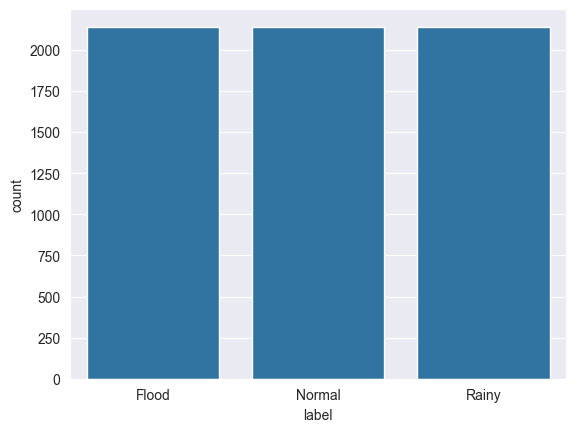

In [4]:
l = []
for i in train:
    if(i[1] == [1,0,0]):
        l.append("Flood")
    elif(i[1] == [0,1,0]):
        l.append("Normal")
    else:
        l.append("Rainy")
# for i in train:
#     if(i[1] == 0):
#         l.append("Flood")
#     else:
#         l.append("Normal")
df = pd.DataFrame({'label': l})

# Set the style
sns.set_style('darkgrid')

# Countplot to visualize the distribution of labels
sns.countplot(data=df, x='label')
plt.show()        

**Previewing the images of both the classes**

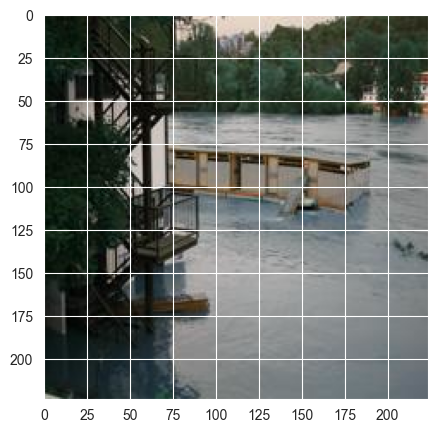

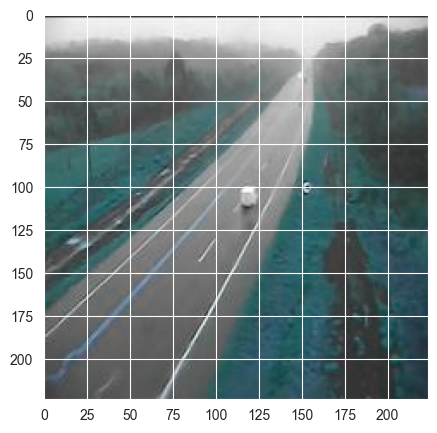

In [5]:
plt.figure(figsize = (5,5))
plt.imshow(train[0][0], cmap='gray')

plt.figure(figsize = (5,5))
plt.imshow(train[-1][0], cmap='gray')


In [6]:
x_train = []
y_train = []

x_val = []
y_val = []

x_test = []
y_test = []

for feature, label in train:
    x_train.append(feature)
    y_train.append(label)

for feature, label in test:
    x_test.append(feature)
    y_test.append(label)
    
for feature, label in val:
    x_val.append(feature)
    y_val.append(label)

In [7]:
# Normalize the data
x_train = np.array(x_train) / 255
x_val = np.array(x_val) / 255
x_test = np.array(x_test) / 255

In [8]:
# resize data for deep learning 
x_train = x_train.reshape(-1, img_size, img_size, 3)
y_train = np.array(y_train)

x_val = x_val.reshape(-1, img_size, img_size, 3)
y_val = np.array(y_val)

x_test = x_test.reshape(-1, img_size, img_size, 3)
y_test = np.array(y_test)

# Data Augmentation


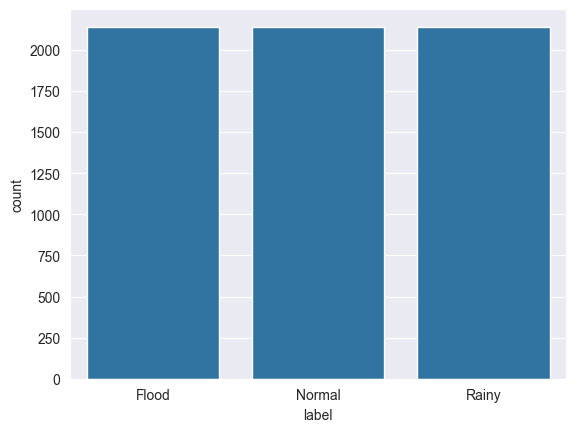

In [9]:
# With data augmentation to prevent overfitting and handling the imbalance in dataset
from sklearn.utils.class_weight import compute_class_weight
class_weights_dict=[2,1]
# class_weights = compute_class_weight( np.unique(y_train), y_train)

# # Convert class weights to dictionary format
# class_weights_dict = dict(enumerate(class_weights))
# datagen = ImageDataGenerator(
#         featurewise_center=True,  # set input mean to 0 over the dataset
#         samplewise_center=True,  # set each sample mean to 0
#         featurewise_std_normalization=True,  # divide inputs by std of the dataset
#         samplewise_std_normalization=True,  # divide each input by its std
#         zca_whitening=False,  # apply ZCA whitening
#         rotation_range = 30,  # randomly rotate images in the range (degrees, 0 to 180)
#         zoom_range = 0.2, # Randomly zoom image 
#         width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
#         height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
#         horizontal_flip = True,  # randomly flip images

#         vertical_flip=False)  # randomly flip images

# datagen.fit(x_train)
# a=datagen.flow((x_train,y_train),batch_size=1)
l = []
for i in train:
    if(i[1] == [1,0,0]):
        l.append("Flood")
    elif(i[1] == [0,1,0]):
        l.append("Normal")
    else:
        l.append("Rainy")
# for i in train:
#     if(i[1] == 0):
#         l.append("Flood")
#     else:
#         l.append("Normal")
df = pd.DataFrame({'label': l})

# Set the style
sns.set_style('darkgrid')

# Countplot to visualize the distribution of labels
sns.countplot(data=df, x='label')
plt.show()

In [10]:
# while(True):
#     try:
#         X, y = next(a)  # get the next batch
#         if(y == 0):
#             l.append("Flood")
#         else:
#             l.append("Normal")
#     except:
#         break


For the data augmentation, i choosed to :
1. Randomly rotate some training images by 30 degrees 
2. Randomly Zoom by 20% some training images
3. Randomly shift images horizontally by 10% of the width 
4. Randomly shift images vertically by 10% of the height 
5. Randomly flip images horizontally.
Once our model is ready, we fit the training dataset.

# Trasfer learning 

In [11]:
# model=keras.applications.MobileNetV2(
#     input_shape=(224,224,3),
#     weights="imagenet",
#     input_tensor=None,
#     pooling=None,
#     classes=1000,
#     classifier_activation="softmax",
# )
#pre  = keras.layers.TFSMLayer("/kaggle/input/mobilenet-v2/tensorflow2/035-224-classification/2", call_endpoint='serving_default')
pre=keras.applications.MobileNetV2(include_top=False ,input_shape=(224,224,3),classes=1000)
#print(pre.summary())
print(len(pre.layers))
for l in pre.layers[:-1]:
    l.trainable=False
# for i in range (25):
#     pre.layers[130+i].trainable = True


154


In [12]:
input_img = tf.keras.Input(shape=(224,224,3))
z1=pre(input_img)
z2=Flatten(name='000')(z1)
z3=BatchNormalization(name='00506')(z2)
d1=Dense(units = 64 , activation = 'relu' ,name='some_unique_name'  , kernel_regularizer=keras.regularizers.L2(),bias_regularizer=keras.regularizers.L2())(z3)
d2=Dense(units = 64 , activation = 'relu',name='2000'   , kernel_regularizer=keras.regularizers.L2(),bias_regularizer=keras.regularizers.L2())(d1)
dr1=Dropout(0.2,name='0006')(d2)
outputs=Dense(units = 3 , activation = 'softmax',name='0070',kernel_regularizer=keras.regularizers.L2(),bias_regularizer=keras.regularizers.L2())(dr1)
# model.add(pre)
# model.add(Flatten(name='000')(z1))
# model.add(BatchNormalization(name='00506'))
#model.add(Dense(units = 64 , activation = 'relu' ,name='some_unique_name'  , kernel_regularizer=keras.regularizers.L2(),bias_regularizer=keras.regularizers.L2()))
# model.add(Dense(units = 64 , activation = 'relu',name='2000'   , kernel_regularizer=keras.regularizers.L2(),bias_regularizer=keras.regularizers.L2()))
# model.add(Dropout(0.2,name='0006'))
# model.add(Dense(units = 3 , activation = 'softmax',name='0070',kernel_regularizer=keras.regularizers.L2(),bias_regularizer=keras.regularizers.L2()))
# model.compile(optimizer = "adam" , loss = 'categorical_crossentropy' , metrics = ['accuracy'])
model=keras.Model(inputs=input_img, outputs=outputs)

model.compile(optimizer = keras.optimizers.Adam(learning_rate=1e-4) , loss  = keras.losses.CategoricalCrossentropy(from_logits=False,reduction="sum") , metrics = ["accuracy"])
model.summary()


print(len(model.layers))

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ mobilenetv2_1.00_224            │ (None, 7, 7, 1280)     │     2,257,984 │
│ (Functional)                    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ 000 (Flatten)                   │ (None, 62720)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ 00506 (BatchNormalization)      │ (None, 62720)          │       250,880 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ some_unique_name (Dense)        │ (None, 64)             │     4,014,144 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ 2000 (Dense)                    │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ 0006 (Dropout)                  │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ 0070 (Dense)                    │ (None, 3)              │           195 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,527,363 (24.90 MB)

 Trainable params: 4,143,939 (15.81 MB)

 Non-trainable params: 2,383,424 (9.09 MB)

8


In [13]:
learning_rate_reduction = ReduceLROnPlateau(monitor='val_loss', patience = 1, verbose=1,factor=0.3, min_lr=0.000001)

In [14]:

from keras.callbacks import Callback

os.makedirs('a/',exist_ok=True)
os.makedirs('b/',exist_ok=True)
class SaveModelWithMaxAccuracy(Callback):
    def __init__(self, save_path='a/', base_filename='model', monitor='val_accuracy'):
        super(SaveModelWithMaxAccuracy, self).__init__()
        self.save_path = save_path
        self.base_filename = base_filename
        self.monitor = monitor
        self.max_accuracy = 0
        self.epoch=0

    def on_epoch_end(self, epoch, logs=None):
        self.epoch+=1
        
        current_accuracy = logs.get(self.monitor)
        if current_accuracy is not None and current_accuracy >= self.max_accuracy-0.03:
            print(f"Model with max accuracy {self.max_accuracy:.4f} now find {current_accuracy} ") 
            self.currentEpoch=self.epoch
            self.max_accuracy = current_accuracy
            self.best_model = self.model.get_weights()


    def on_train_end(self, logs=None):
        model_filename = os.path.join(self.save_path, f"{self.base_filename}.keras")
        self.model.set_weights(self.best_model)
        self.model.save(model_filename)
        print(f"Model with max {self.monitor} at epoch {self.currentEpoch} ({self.max_accuracy:.4f}) saved as {model_filename}")

# Your model.fit() call
save_model_callback = SaveModelWithMaxAccuracy(save_path='a/', base_filename='best_model')
class SaveModelWithMinLoss(Callback):
    def __init__(self, save_path='b/', base_filename='model', monitor='val_loss'):
        super(SaveModelWithMinLoss, self).__init__()
        self.save_path = save_path
        self.base_filename = base_filename
        self.monitor = monitor
        self.min_loss = 10000
        self.epoch=0
    def on_epoch_end(self, epoch, logs=None):
        self.epoch+=1
        current_accuracy = logs.get(self.monitor)
        if current_accuracy is not None and current_accuracy <= self.min_loss:
            print(f"Model with Min Loss {self.min_loss:.4f} now find {current_accuracy} ") 

            self.min_loss = current_accuracy
            self.best_model = self.model.get_weights()


    def on_train_end(self, logs=None):
        model_filename = os.path.join(self.save_path, f"{self.base_filename}.keras")
        self.model.set_weights(self.best_model)
        self.model.save(model_filename)
        print(f"Model with in {self.monitor} at epoch {self.epoch} ({self.min_loss:.4f}) saved as {model_filename}")

# Your model.fit() call
save_model_callback2 = SaveModelWithMinLoss(save_path='b/', base_filename='best_model')


In [15]:
from sklearn.model_selection import train_test_split
import numpy as np
import tensorflow as tf


def create_dataset(X, Y, batch_size):
  """ Create train and test TF dataset from X and Y
    The prefetch overlays the preprocessing and model execution of a training step. 
    While the model is executing training step s, the input pipeline is reading the data for step s+1.
    AUTOTUNE automatically tune the number for sample which are prefeteched automatically. 
    
    Keyword arguments:
    X -- numpy array
    Y -- numpy array
    batch_size -- integer
  """
  AUTOTUNE = tf.data.experimental.AUTOTUNE
  
  X = X.astype('float32')
  Y = Y.astype('float32')
  
 
  
  train_dataset = tf.data.Dataset.from_tensor_slices((X, Y))
  train_dataset = train_dataset.shuffle(buffer_size=1000, reshuffle_each_iteration=True)
  train_dataset = train_dataset.batch(batch_size).prefetch(AUTOTUNE)
  
  
  return train_dataset

In [25]:
pre=keras.applications.MobileNetV2(include_top=False ,input_shape=(224,224,3),classes=1000)
#print(pre.summary())
print(len(pre.layers))
for l in pre.layers[:-1]:
    l.trainable=False
input_img = tf.keras.Input(shape=(224,224,3))
z1=pre(input_img)
z2=Flatten(name='000')(z1)
z3=BatchNormalization(name='00506')(z2)
d1=Dense(units = 64 , activation = 'relu' ,name='some_unique_name'  , kernel_regularizer=keras.regularizers.L2(),bias_regularizer=keras.regularizers.L2())(z3)
d2=Dense(units = 64 , activation = 'relu',name='2000'   , kernel_regularizer=keras.regularizers.L2(),bias_regularizer=keras.regularizers.L2())(d1)
dr1=Dropout(0.2,name='0006')(d2)
outputs=Dense(units = 3 , activation = 'softmax',name='0070',kernel_regularizer=keras.regularizers.L2(),bias_regularizer=keras.regularizers.L2())(dr1)
a=keras.Model(inputs=input_img, outputs=outputs)
a.load_weights("b/best_model.keras")


In [17]:
#history = model.fit(datagen.flow(x_train,y_train, batch_size = 32) ,epochs = 12 , validation_data = datagen.flow(x_val, y_val) ,callbacks = [learning_rate_reduction,save_model_callback,save_model_callback2])
history = model.fit(create_dataset(x_train, y_train,32), epochs=12,validation_data = create_dataset(x_val, y_val,32) ,callbacks = [learning_rate_reduction,save_model_callback,save_model_callback2])

Epoch 1/12
201/201 ━━━━━━━━━━━━━━━━━━━━ 0s 377ms/step - accuracy: 0.8551 - loss: 16.9003Model with max accuracy 0.0000 now find 0.8571428656578064 
Model with Min Loss 10000.0000 now find 12.874692916870117 
201/201 ━━━━━━━━━━━━━━━━━━━━ 86s 385ms/step - accuracy: 0.8553 - loss: 16.8881 - val_accuracy: 0.8571 - val_loss: 12.8747 - learning_rate: 1.0000e-04
Epoch 2/12
201/201 ━━━━━━━━━━━━━━━━━━━━ 0s 369ms/step - accuracy: 0.7666 - loss: 33.3015Model with max accuracy 0.8571 now find 0.9523809552192688 
Model with Min Loss 12.8747 now find 7.581603050231934 
201/201 ━━━━━━━━━━━━━━━━━━━━ 75s 371ms/step - accuracy: 0.7671 - loss: 33.2111 - val_accuracy: 0.9524 - val_loss: 7.5816 - learning_rate: 1.0000e-04
Epoch 3/12
201/201 ━━━━━━━━━━━━━━━━━━━━ 0s 374ms/step - accuracy: 0.8584 - loss: 16.9646
Epoch 3: ReduceLROnPlateau reducing learning rate to 2.9999999242136255e-05.
201/201 ━━━━━━━━━━━━━━━━━━━━ 75s 375ms/step - accuracy: 0.8588 - loss: 16.9266 - val_accuracy: 0.9048 - val_loss: 8.7316 - 

In [ ]:
model.summary()
print("Loss of the model is - " , model.evaluate(x_test,y_test)[0])
print("Accuracy of the model is - " , model.evaluate(x_test,y_test)[1]*100 , "%")
model.save('output.keras')

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ mobilenetv2_1.00_224            │ (None, 7, 7, 1280)     │     2,257,984 │
│ (Functional)                    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ 000 (Flatten)                   │ (None, 62720)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ 00506 (BatchNormalization)      │ (None, 62720)          │       250,880 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ 2000 (Dense)                    │ (None, 64)             │     4,014,144 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ 0006 (Dropout)                  │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ 0070 (Dense)                    │ (None, 3)              │           195 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,802,763 (56.47 MB)

 Trainable params: 4,139,779 (15.79 MB)

 Non-trainable params: 2,383,424 (9.09 MB)

 Optimizer params: 8,279,560 (31.58 MB)

19/19 ━━━━━━━━━━━━━━━━━━━━ 8s 344ms/step - categorical_accuracy: 0.9167 - loss: 8.7558
Loss of the model is -  9.267187118530273
19/19 ━━━━━━━━━━━━━━━━━━━━ 6s 330ms/step - categorical_accuracy: 0.9167 - loss: 8.7558
Accuracy of the model is -  90.83333611488342 %


In [18]:
model.load_weights("a/best_model.keras")
print("Loss of the model is - " , model.evaluate(x_test,y_test)[0])
print("Accuracy of the model is - " , model.evaluate(x_test,y_test)[1]*100 , "%")
model.save('accuracy.keras')

19/19 ━━━━━━━━━━━━━━━━━━━━ 8s 334ms/step - accuracy: 0.8278 - loss: 24.3385
Loss of the model is -  16.162269592285156
19/19 ━━━━━━━━━━━━━━━━━━━━ 6s 331ms/step - accuracy: 0.8278 - loss: 24.3385
Accuracy of the model is -  89.49999809265137 %


In [19]:
model.load_weights("b/best_model.keras")
print("Loss of the model is - " , model.evaluate(x_test,y_test)[0])
print("Accuracy of the model is - " , model.evaluate(x_test,y_test)[1]*100 , "%")
model.save('loss.keras')

19/19 ━━━━━━━━━━━━━━━━━━━━ 6s 325ms/step - accuracy: 0.9204 - loss: 9.9697
Loss of the model is -  10.111809730529785
19/19 ━━━━━━━━━━━━━━━━━━━━ 6s 326ms/step - accuracy: 0.9204 - loss: 9.9697
Accuracy of the model is -  91.33333563804626 %


In [20]:
#saving model

# Analysis after Model Training

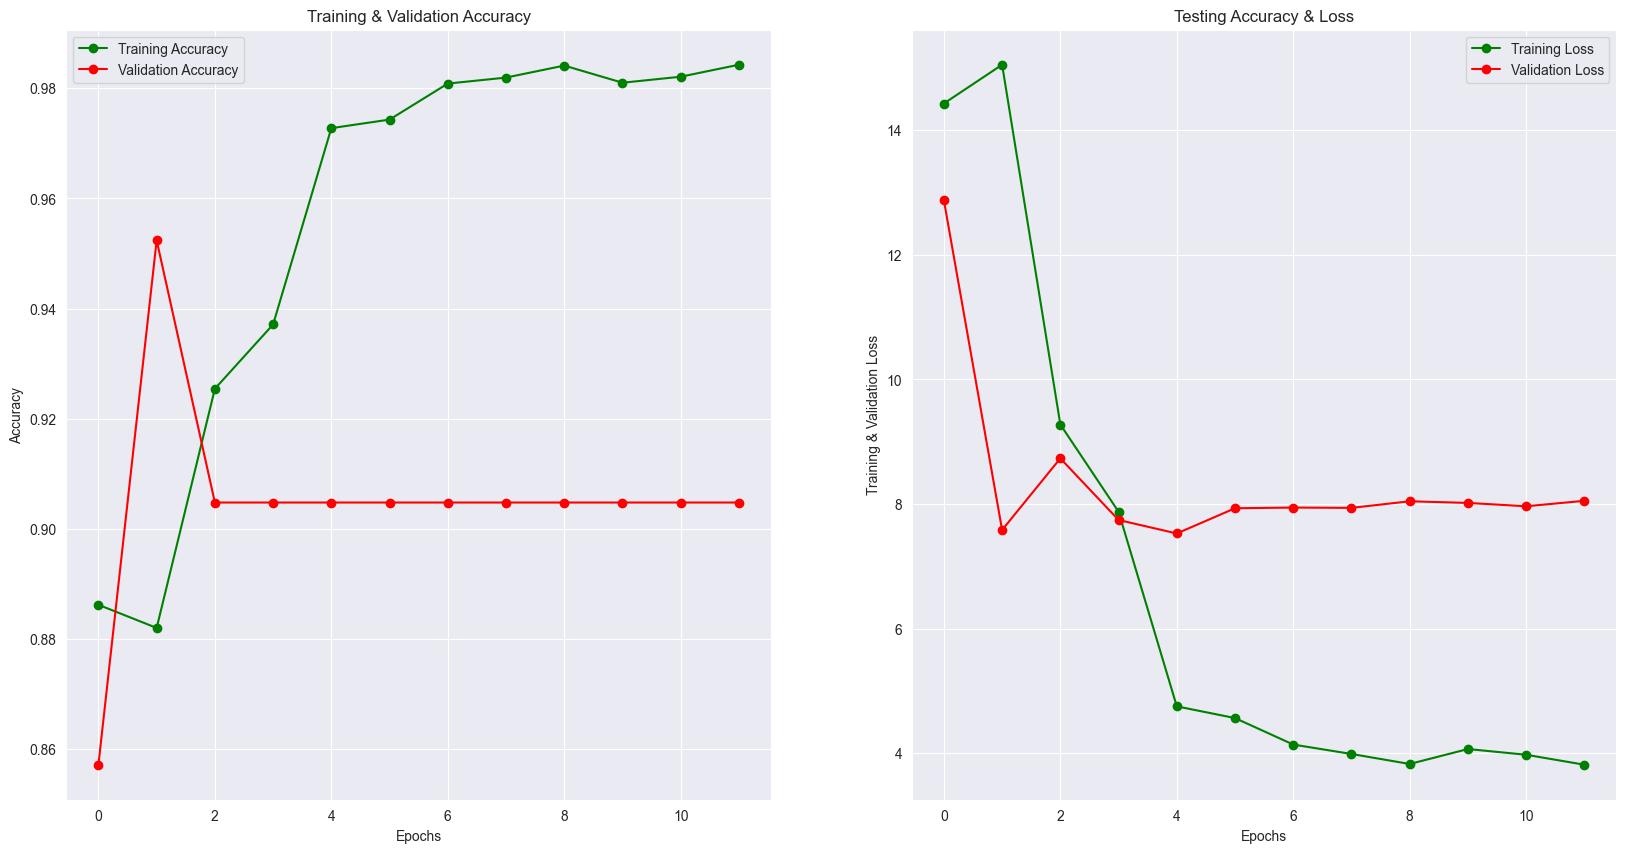

In [23]:
epochs = [i for i in range(12)]
fig , ax = plt.subplots(1,2)
train_acc = history.history['accuracy']
train_loss = history.history['loss']
val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']
fig.set_size_inches(20,10)

ax[0].plot(epochs , train_acc , 'go-' , label = 'Training Accuracy')
ax[0].plot(epochs , val_acc , 'ro-' , label = 'Validation Accuracy')
ax[0].set_title('Training & Validation Accuracy')
ax[0].legend()
ax[0].set_xlabel("Epochs")
ax[0].set_ylabel("Accuracy")

ax[1].plot(epochs , train_loss , 'g-o' , label = 'Training Loss')
ax[1].plot(epochs , val_loss , 'r-o' , label = 'Validation Loss')
ax[1].set_title('Testing Accuracy & Loss')
ax[1].legend()
ax[1].set_xlabel("Epochs")
ax[1].set_ylabel("Training & Validation Loss")
plt.show()

In [ ]:
predict_x=model.predict(x_test) 
# predictions=np.greater(predict_x,0.5).astype(int)
predictions=np.argmax(predict_x,axis=1)
y_test=np.argmax(y_test,axis=1)
print(y_test)
predictions = predictions.reshape(1,-1)[0]
print(predictions)

19/19 ━━━━━━━━━━━━━━━━━━━━ 8s 384ms/step
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 

In [ ]:
# print(classification_report(y_test, predictions, target_names = ['Flood', 'Normal']))
print(classification_report(y_test, predictions, target_names = ['Flood', 'Normal','Rainy']))

              precision    recall  f1-score   support

       Flood       0.84      0.93      0.88       200
      Normal       0.93      0.92      0.92       200
       Rainy       0.97      0.89      0.93       200

    accuracy                           0.91       600
   macro avg       0.91      0.91      0.91       600
weighted avg       0.91      0.91      0.91       600



In [ ]:
cm = confusion_matrix(y_test,predictions)


In [ ]:
# cm = pd.DataFrame(cm , index = ['0','1'] , columns = ['0','1'])
cm = pd.DataFrame(cm , index = ['0','1','2'] , columns = ['0','1','2'])

<Axes: >

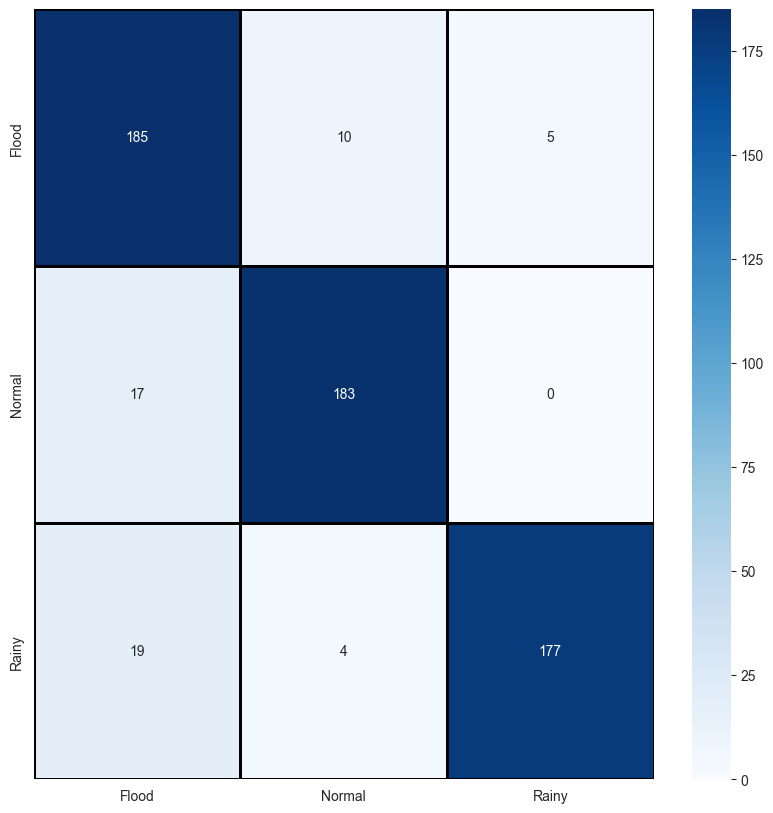

In [ ]:
plt.figure(figsize = (10,10))
sns.heatmap(cm,cmap= "Blues", linecolor = 'black' , linewidth = 1 , annot = True, fmt='',xticklabels = labels,yticklabels = labels)

In [ ]:
correct = np.nonzero(predictions == y_test)[0]
incorrect = np.nonzero(predictions != y_test)[0]

**Some of the Correctly Predicted Classes**

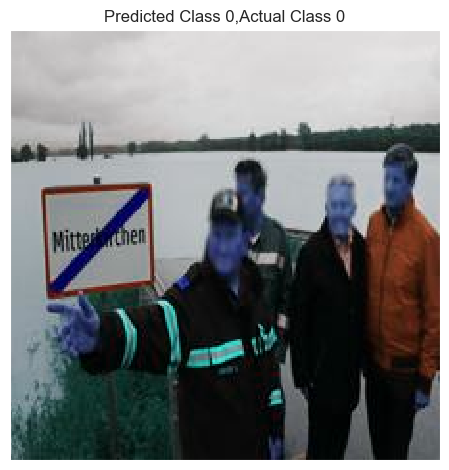

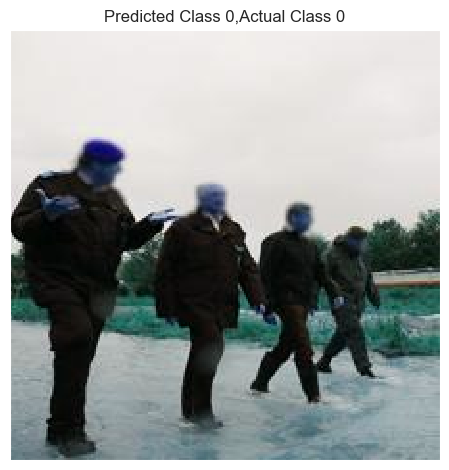

In [ ]:
i = 0
for c in correct[:2]:
    plt.figure()
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_test[c].reshape(224,224,3), interpolation='none')
    plt.title("Predicted Class {},Actual Class {}".format(predictions[c], y_test[c]))
    plt.tight_layout()
    i += 1

**Some of the Incorrectly Predicted Classes**

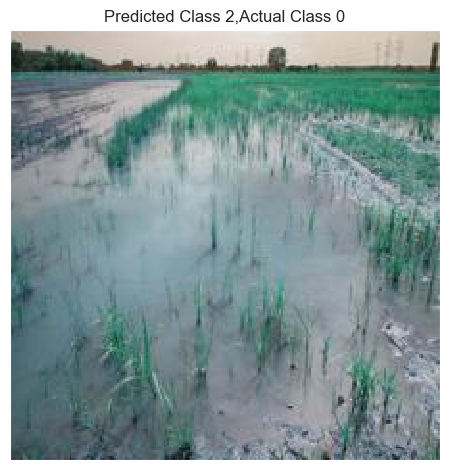

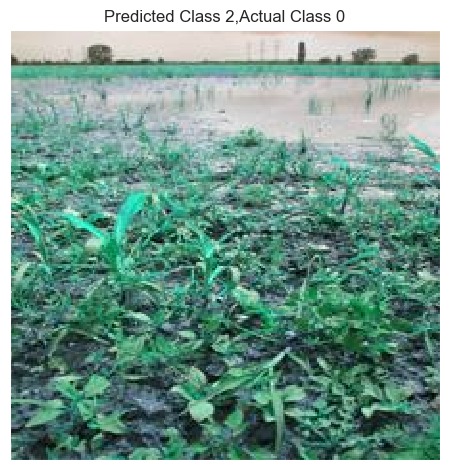

In [ ]:
i = 0
for c in incorrect[:2]:
    plt.figure()
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_test[c].reshape(224,224,3), cmap="gray", interpolation='none')
    plt.title("Predicted Class {},Actual Class {}".format(predictions[c], y_test[c]))
    plt.tight_layout()
    i += 1

In [ ]:
import numpy as np
import keras
from keras.preprocessing import image
from keras.models import load_model
# Define a function to preprocess the image
def preprocess_image(image_path):
    img = image.load_img(image_path, target_size=(224, 224,3))  # Assuming the model expects images of size 224x224
    img_array = image.img_to_array(img)/255
    img_array = np.expand_dims(img_array, axis=0)
    return img_array
path="Test\\Rainy\\"
path=".\\"

for name in os.listdir(path)[:40]:
    if name.split(".")[-1]=="jpg" or name.split(".")[-1]=="jpeg":
        image_path = name  # Update path_to_your_image with the actual path
        
        img = preprocess_image(path+image_path)

        # Make a prediction
        prediction = model.predict(img,verbose=0)
        #print(prediction)
        # Decode the prediction
        # For example, if the model is a classification model with softmax activation, you can decode the prediction as follows:
        #predicted_class = prediction>0.5
        predicted_class = np.argmax(prediction)
        if predicted_class==0:
            predicted_class="Flood" 
        elif predicted_class==1:
            predicted_class="Normal"
        else:
            predicted_class="Rainy"
        print("image: ",name," Predicted class:", predicted_class)

image:  0.jpg  Predicted class: Flood
image:  1.jpg  Predicted class: Normal
image:  2.jpg  Predicted class: Rainy
image:  BuonoCatania.jpg  Predicted class: Normal
image:  pioggia.jpg  Predicted class: Rainy
image:  pioggia2.jpg  Predicted class: Rainy
image:  torino-pioggia-2.jpg  Predicted class: Flood
image:  viagrastronomica-201809121000_img2283.jpg  Predicted class: Rainy
